# PA 3: Association Analysis - Apriori Algorithm!


## Student Details
Student Name and ID:  Sai Rohith Pasala; 1001873156  <----- Only this student will submit the assignment

Student Name and ID:  Sri Naga Venkata Pavan Kalyan Sirigibattula; 1001886149

Student Name and ID:  Rutvik Naga Sai Dondapati; 1001879177


Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.


## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false;
}


<IPython.core.display.Javascript object>

In [2]:
# Importing all the necessary Libraries
import pandas as pd
import csv


from IPython.display import Image

# Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'dataset_group.csv' to look like the toyDS.csv.
Each transaction is at one line with a variable length. Discard the date attribute (1st attribute) from your dataset. For example, in your dataset transaction#4 should look like:

cereals,juice,lunch meat,soda,toilet paper,all-purpose

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


ScreenShot of the toyDS.csv


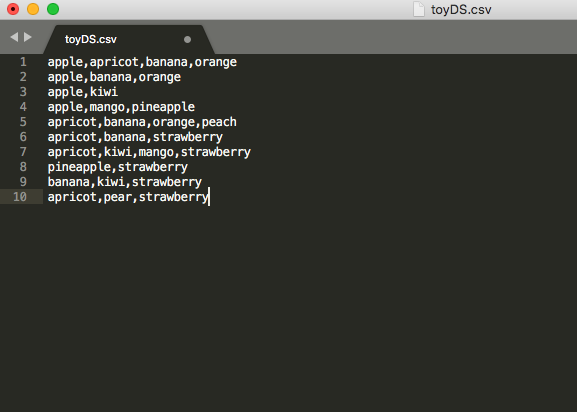

In [3]:
print ('ScreenShot of the toyDS.csv')
Image("SampleScreen01.png")

# Data Preprocessing - Dropping date Column, Gruouping by the dataset with respect to the Transaction column 

In [4]:
# ========================= Code for Task 1 ============== ===
Bread_dataframe = pd.DataFrame
# Reading the Dataset with the help of the read_csv function.
Bread_input_df = pd.read_csv('bread basket.csv')
#deleting the date_time column from the bread basket.csv dataset.
Bread_input_df=Bread_input_df.drop(['date_time'],axis=1) 
#making the items in one line according to Transaction Column and removing the duplicate entries
Bread_dataframe = Bread_input_df.groupby(['Transaction'])['Item'].apply(','.join).reset_index()
itemstring=Bread_dataframe['Item'].str.split(',')

itemlist=itemstring.tolist()
dataset= pd.DataFrame(itemlist)
#saving the data to a new file in the csv format. 
dataset.to_csv('dataset.csv', index = False,header=False)


In [5]:
procesd_data = pd.read_csv('dataset.csv',header=None)
pd.options.display.max_colwidth = 1000
#sample display of the dataset after preprocess

In [6]:
Bread_dataframe.isnull().sum()
#checking the datset for null values

Transaction    0
Item           0
dtype: int64

In [7]:
#printing the first 10 entries of the newly formed dataset

procesd_data.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Medialuna,Pastry,Coffee,Tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Bread,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Scandinavian,Medialuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#display last 10 elements of preprocessed datatset sv
procesd_data.tail(10)

,0,1,2,3,4,5,6,7,8,9,10
9455,Coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9456,Smoothies,Sandwich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9457,Tacos/Fajita,Coke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9458,Coffee,Tacos/Fajita,Toast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9459,Bread,Spanish Brunch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9460,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9461,Truffles,Tea,Spanish Brunch,Christmas common,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9462,Muffin,Tacos/Fajita,Coffee,Tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9463,Coffee,Pastry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9464,Smoothies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#checking the properties of the dataset
procesd_data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9465,5834,2926,1398,548,207,72,34,13,6,4
unique,83,80,70,59,57,43,29,18,8,6,3
top,Coffee,Coffee,Coffee,Coffee,Coffee,Bread,Cake,Cookies,Alfajores,Baguette,Hot chocolate
freq,3185,1491,506,207,59,22,8,6,3,1,2


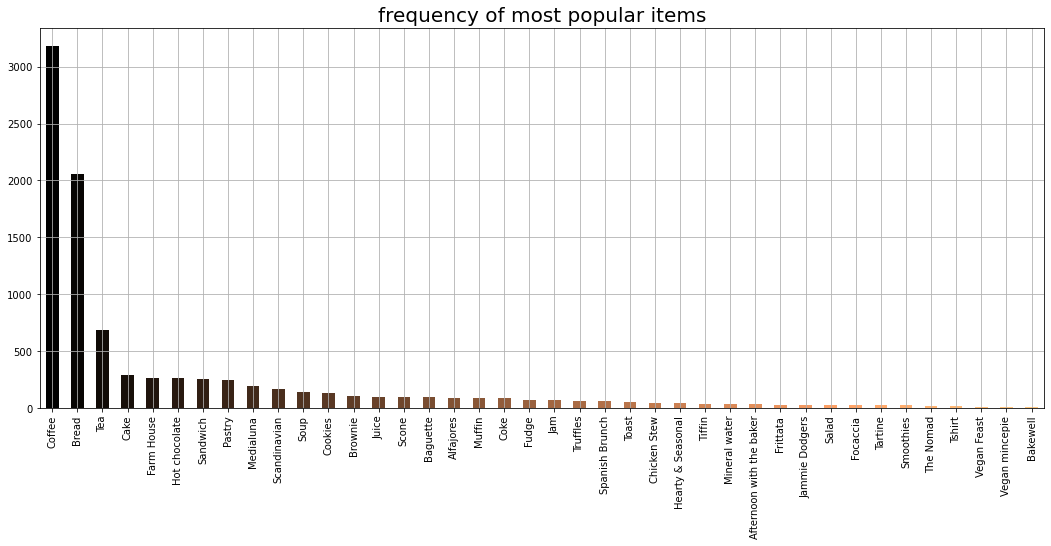

In [10]:
#Sample visualization to see the dataset in bar Graph
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
procesd_data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

# Task 2: Run apriory.py and Evaluate Results
In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!".

(*) For those that are not familiar with python and coding this could be a quite demanding task.

You will have to execute apriori algorithm "3" times for different combinations of support and confidence. Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods.

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way.
 
You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments.


In [11]:

print ('======================== Code for Task 2, Case:1 ===========================') 
print('***********************************************************************************************************')
print('After observing the support values of each item in the given dataset, I came to an understanding that most of the items support range is from 0.02 to 0.478 and if the min-support exceeds 47.8 percent then none of the items will be\nconsidered as frequent set item and no rules will generated. So, to avoid this case we have considered the support values  which are less than 47.8 percent as minimum support.')
print('***********************************************************************************************************')
print ('Case 1 (minimum support= 1% and minimum confidence= 20%)')

print ('Case 1 Reasoning: \nApriori depends up on two values- support and confidence \nsupport indicates in how many number of transactions a particular item is present out of all transactions\nand if the item qualifies for minimum support it goes to frequent items\nconfidence indicates how two or more items dependent on each other')
print('\nIn this case: min-support is 1% and min-confidece is 20%')
print('The min-confidence is 0.01 which means that, in a x->y rule, if x item set is already in the basket, there is 1% min-chance that y item set is also added to the basket.')
print ('Case 1 Output:')
#syntax to run the given dataset which is preprocessed agianst apriori.py file

%run apriori.py -f dataset.csv -s 0.01 -c 0.2

======================== Code for Task 2, Case:1 ===========================
***********************************************************************************************************
After observing the support values of each item in the given dataset, I came to an understanding that most of the items support range is from 0.02 to 0.478 and if the min-support exceeds 47.8 percent then none of the items will be
considered as frequent set item and no rules will generated. So, to avoid this case we have considered the support values  which are less than 47.8 percent as minimum support.
***********************************************************************************************************
Case 1 (minimum support= 1% and minimum confidence= 20%)
Case 1 Reasoning: 
Apriori depends up on two values- support and confidence 
support indicates in how many number of transactions a particular item is present out of all transactions
and if the item qualifies for minimum support it goes to fre

In [12]:
print ('======================== Code for Task 2, Case:2 ===========================')
print ('Case 2 (minimum support= 3% and minimum confidence= 10%)') 
print ('Case 2 Reasoning:\nAs the minimum support is increased compared to before case (case-1) by which less number of the frequent items gets selected\nand as the confidence values increased the accuracy of the data increases')
print('The min-confidence is 3% which means that, in a x->y rule, if x item set is already in the basket then there is 3% min-chance that y item set is also added to the basket.\n')
print ('Case 2 Output:') 
#syntax to run the given dataset which is preprocessed agianst apriori.py file

%run apriori.py -f dataset.csv -s 0.03 -c 0.1

======================== Code for Task 2, Case:2 ===========================
Case 2 (minimum support= 3% and minimum confidence= 10%)
Case 2 Reasoning:
As the minimum support is increased compared to before case (case-1) by which less number of the frequent items gets selected
and as the confidence values increased the accuracy of the data increases
The min-confidence is 3% which means that, in a x->y rule, if x item set is already in the basket then there is 3% min-chance that y item set is also added to the basket.

Case 2 Output:

------------ITEMS-----------------
item: ('Toast',) , 0.034
item: ('Soup',) , 0.034
item: ('Scone',) , 0.035
item: ('Medialuna', 'Coffee') , 0.035
item: ('Alfajores',) , 0.036
item: ('Coffee', 'Sandwich') , 0.038
item: ('Muffin',) , 0.038
item: ('Juice',) , 0.039
item: ('Farm House',) , 0.039
item: ('Brownie',) , 0.040
item: ('Pastry', 'Coffee') , 0.048
item: ('Tea', 'Coffee') , 0.050
item: ('Cookies',) , 0.054
item: ('Coffee', 'Cake') , 0.055
item: ('Hot 

In [13]:
print ('======================== Code for Task 2, Case:3 ===========================')
print ('Case 3 (minimum support= 10% and minimum confidence= 50%)')

print ('Case 3 Reasoning:\nIn this minimum support value is increased further to 10% and minimum confidence is increased to 50%.')
print('As the support values is 10%, more number of frequent items gets selected compared to case 1 and case2 \nand as the confidence is 50% if one item is in the basket the other item has 50% minimum chance getting\npicked by the customer')
print('We can say that as the confidence value increases, the number of rules decreases and vice versa. In this\ncase, The probability of the item Y being chosen when the item X selected is high.Also since the frequently selceted items is more or support is less wide range of items list is displayed. ')
print ('Case 3 Output:')
#syntax to run the given dataset which is preprocessed agianst apriori.py file

%run apriori.py -f dataset.csv -s 0.1 -c 0.5

======================== Code for Task 2, Case:3 ===========================
Case 3 (minimum support= 10% and minimum confidence= 50%)
Case 3 Reasoning:
In this minimum support value is increased further to 10% and minimum confidence is increased to 50%.
As the support values is 10%, more number of frequent items gets selected compared to case 1 and case2 
and as the confidence is 50% if one item is in the basket the other item has 50% minimum chance getting
picked by the customer
We can say that as the confidence value increases, the number of rules decreases and vice versa. In this
case, The probability of the item Y being chosen when the item X selected is high.Also since the frequently selceted items is more or support is less wide range of items list is displayed. 
Case 3 Output:

------------ITEMS-----------------
item: ('Cake',) , 0.104
item: ('Tea',) , 0.143
item: ('Bread',) , 0.327
item: ('Coffee',) , 0.478

------------RULES-----------------




# References

[01] https://www.kaggle.com/acostasg/random-shopping-cart

[02] https://github.com/asaini/Apriori
